In [1]:
# Essential imports for data science and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PyTorch for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           f1_score, precision_score, recall_score)
from sklearn.utils.class_weight import compute_class_weight

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Configure visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Environment Setup:")
print(f"   Device: {device}")
print(f"   PyTorch Version: {torch.__version__}")
print(f"   Pandas Version: {pd.__version__}")
print(f"   NumPy Version: {np.__version__}")

if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

print("\n✅ All libraries imported successfully!")
print("📊 Ready to begin customer churn analysis...")

🚀 Environment Setup:
   Device: cpu
   PyTorch Version: 2.8.0+cpu
   Pandas Version: 2.3.3
   NumPy Version: 2.3.3

✅ All libraries imported successfully!
📊 Ready to begin customer churn analysis...


In [2]:
# Monitoring Framework Implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime, timedelta

class ModelMonitoringFramework:
    """
    Comprehensive monitoring framework for production ML models

    This framework monitors:
    1. Data drift (distribution changes in features)
    2. Model performance metrics over time
    3. Business impact and ROI

    It includes alerting mechanisms and visualization capabilities.
    """

    def __init__(self, feature_columns, performance_thresholds=None):
        """
        Initialize monitoring framework

        Args:
            feature_columns (list): List of feature names to monitor
            performance_thresholds (dict, optional): Alert thresholds for metrics
        """
        self.feature_columns = feature_columns
        self.performance_thresholds = performance_thresholds or {
            'auc_min': 0.75,
            'precision_min': 0.6,
            'recall_min': 0.5,
            'psi_max': 0.2,  # Population Stability Index threshold
            'data_drift_pvalue': 0.05
        }

        # Initialize storage for monitoring data
        self.baseline_distributions = {}
        self.feature_statistics = {}
        self.performance_history = []
        self.business_metrics_history = []
        self.drift_metrics_history = []

        print(f"🔍 Monitoring framework initialized")
        print(f"   • Monitoring {len(feature_columns)} features")
        print(f"   • Performance alert thresholds set")

    def set_baseline_distributions(self, X_baseline):
        """
        Set baseline feature distributions to compare against

        Args:
            X_baseline (DataFrame): Baseline feature data (typically training data)
        """
        print(f"📊 Setting baseline distributions...")

        for feature in self.feature_columns:
            if feature in X_baseline.columns:
                values = X_baseline[feature].values
                print(f"   Setting Baseline for '{feature}'")
                # Store distribution statistics
                self.baseline_distributions[feature] = {
                    'mean': np.mean(values),
                    'std': np.std(values),
                    'min': np.min(values),
                    'max': np.max(values),
                    'median': np.median(values),
                    'q25': np.percentile(values, 25),
                    'q75': np.percentile(values, 75),
                    'histogram': np.histogram(values, bins=20, density=True)
                }

                print(f"   ✅ Baseline set for '{feature}'")
            else:
                print(f"   ⚠️ Feature '{feature}' not found in baseline data")

        print(f"✅ Baseline distributions set for {len(self.baseline_distributions)} features")

    def calculate_psi(self, expected_array, actual_array, bins=10):
        """
        Calculate Population Stability Index (PSI)

        PSI measures how much a distribution has changed:
        - PSI < 0.1: No significant change
        - 0.1 <= PSI < 0.2: Moderate change, worth investigating
        - PSI >= 0.2: Significant change, requires attention

        Args:
            expected_array (array-like): Expected/baseline distribution
            actual_array (array-like): Actual/new distribution
            bins (int): Number of bins for histogram

        Returns:
            float: PSI value
        """
        # Create buckets based on expected distribution
        breakpoints = np.linspace(min(expected_array), max(expected_array), bins+1)

        # Get histogram counts
        expected_counts, _ = np.histogram(expected_array, bins=breakpoints)
        actual_counts, _ = np.histogram(actual_array, bins=breakpoints)

        # Add small epsilon to avoid division by zero
        epsilon = 1e-6
        expected_percents = expected_counts / sum(expected_counts) + epsilon
        actual_percents = actual_counts / sum(actual_counts) + epsilon

        # Calculate PSI
        psi_value = sum((actual_percents - expected_percents) *
                        np.log(actual_percents / expected_percents))

        return psi_value

    def check_data_drift(self, X_new):
        """
        Check for data drift in features

        Args:
            X_new (DataFrame): New feature data to check for drift

        Returns:
            dict: Drift detection results
        """
        drift_results = {}

        print(f"🔍 Checking for data drift...")

        for feature in self.feature_columns:
            if feature not in X_new.columns:
                print(f"   ⚠️ Feature '{feature}' not found in new data")
                continue

            if feature not in self.baseline_distributions:
                print(f"   ⚠️ No baseline for feature '{feature}'")
                continue

            baseline_values = None  # Would be extracted from baseline histogram
            new_values = X_new[feature].values

            # Placeholder for actual baseline values
            # In practice, you'd store the actual values or a sample
            baseline_stats = self.baseline_distributions[feature]

            # Calculate distribution statistics
            drift_results[feature] = {
                'mean_change': (np.mean(new_values) - baseline_stats['mean']) / baseline_stats['mean'],
                'std_change': (np.std(new_values) - baseline_stats['std']) / baseline_stats['std'],
                'mean_new': np.mean(new_values),
                'std_new': np.std(new_values)
            }

            # Statistical tests
            # If we had actual baseline values, we'd use:
            # ks_statistic, ks_pvalue = stats.ks_2samp(baseline_values, new_values)
            # For demonstration, we'll simulate:
            mu, std = baseline_stats['mean'], baseline_stats['std']
            simulated_baseline = np.random.normal(mu, std, 1000)
            ks_statistic, ks_pvalue = stats.ks_2samp(simulated_baseline, new_values)

            drift_results[feature]['ks_statistic'] = ks_statistic
            drift_results[feature]['ks_pvalue'] = ks_pvalue
            drift_results[feature]['drift_detected'] = ks_pvalue < self.performance_thresholds['data_drift_pvalue']

            # Calculate PSI if we have histograms
            # For simulation purposes, we'll estimate PSI:
            drift_results[feature]['psi'] = self.calculate_psi(simulated_baseline, new_values)
            drift_results[feature]['significant_drift'] = drift_results[feature]['psi'] > self.performance_thresholds['psi_max']

            # Log the result
            if drift_results[feature]['drift_detected']:
                print(f"   ⚠️ Drift detected in '{feature}': PSI = {drift_results[feature]['psi']:.4f}")
            else:
                print(f"   ✅ No significant drift in '{feature}'")

        # Store drift metrics in history
        current_time = datetime.now()
        self.drift_metrics_history.append({
            'timestamp': current_time,
            'metrics': {
                feature: {
                    'psi': results['psi'],
                    'drift_detected': results['drift_detected']
                } for feature, results in drift_results.items()
            }
        })

        # Return overall drift status
        any_drift_detected = any(results['drift_detected'] for results in drift_results.values())
        significant_drift = any(results['significant_drift'] for results in drift_results.values())

        drift_summary = {
            'timestamp': current_time,
            'any_drift_detected': any_drift_detected,
            'significant_drift': significant_drift,
            'feature_results': drift_results,
            'retraining_recommended': significant_drift
        }

        if significant_drift:
            print(f"🚨 ALERT: Significant data drift detected. Model retraining recommended.")
        elif any_drift_detected:
            print(f"⚠️ ALERT: Some data drift detected. Monitor closely.")
        else:
            print(f"✅ No significant data drift detected.")

        return drift_summary

    def log_performance_metrics(self, timestamp, metrics):
        """
        Log model performance metrics

        Args:
            timestamp (datetime): Time of metrics calculation
            metrics (dict): Performance metrics dictionary
        """
        self.performance_history.append({
            'timestamp': timestamp,
            'metrics': metrics
        })

        # Check for performance degradation
        if len(self.performance_history) > 1:
            current = metrics
            previous = self.performance_history[-2]['metrics']

            alerts = []

            # Check each metric against thresholds
            if current['auc'] < self.performance_thresholds['auc_min']:
                alerts.append(f"AUC below threshold: {current['auc']:.3f} < {self.performance_thresholds['auc_min']}")

            if current['precision'] < self.performance_thresholds['precision_min']:
                alerts.append(f"Precision below threshold: {current['precision']:.3f} < {self.performance_thresholds['precision_min']}")

            if current['recall'] < self.performance_thresholds['recall_min']:
                alerts.append(f"Recall below threshold: {current['recall']:.3f} < {self.performance_thresholds['recall_min']}")

            # Performance degradation from previous period
            if current['auc'] < previous['auc'] * 0.95:  # 5% degradation
                alerts.append(f"AUC decreased by {(previous['auc'] - current['auc'])/previous['auc']*100:.1f}%")

            if alerts:
                print(f"🚨 PERFORMANCE ALERTS:")
                for alert in alerts:
                    print(f"   • {alert}")

                if current['auc'] < self.performance_thresholds['auc_min'] * 0.9:  # 10% below threshold
                    print(f"   ⚠️ CRITICAL: Performance significantly below thresholds. Model retraining recommended.")
            else:
                print(f"✅ Performance metrics within acceptable thresholds.")

    def log_business_metrics(self, timestamp, metrics):
        """
        Log business impact metrics

        Args:
            timestamp (datetime): Time of metrics calculation
            metrics (dict): Business metrics dictionary
        """
        self.business_metrics_history.append({
            'timestamp': timestamp,
            'metrics': metrics
        })

        # Check for business metric degradation
        if len(self.business_metrics_history) > 1:
            current = metrics
            previous = self.business_metrics_history[-2]['metrics']

            alerts = []

            # Check ROI degradation
            if 'roi' in current and 'roi' in previous:
                if current['roi'] < previous['roi'] * 0.8:  # 20% ROI decrease
                    alerts.append(f"ROI decreased by {(previous['roi'] - current['roi'])/previous['roi']*100:.1f}%")

            # Check campaign effectiveness
            if 'campaign_effectiveness' in current and 'campaign_effectiveness' in previous:
                if current['campaign_effectiveness'] < previous['campaign_effectiveness'] * 0.8:
                    alerts.append(f"Campaign effectiveness decreased by {(previous['campaign_effectiveness'] - current['campaign_effectiveness'])/previous['campaign_effectiveness']*100:.1f}%")

            if alerts:
                print(f"🚨 BUSINESS IMPACT ALERTS:")
                for alert in alerts:
                    print(f"   • {alert}")
            else:
                print(f"✅ Business metrics within acceptable ranges.")

    def visualize_monitoring_dashboard(self):
        """
        Generate comprehensive monitoring dashboard
        """
        if not self.performance_history:
            print("⚠️ No performance data available for visualization.")
            return

        fig = plt.figure(figsize=(18, 14))

        # 1. Performance Metrics Over Time
        ax1 = plt.subplot(3, 2, 1)
        timestamps = [entry['timestamp'] for entry in self.performance_history]
        auc_scores = [entry['metrics'].get('auc', 0) for entry in self.performance_history]
        precision_scores = [entry['metrics'].get('precision', 0) for entry in self.performance_history]
        recall_scores = [entry['metrics'].get('recall', 0) for entry in self.performance_history]

        ax1.plot(timestamps, auc_scores, 'b-', marker='o', label='AUC')
        ax1.plot(timestamps, precision_scores, 'g-', marker='s', label='Precision')
        ax1.plot(timestamps, recall_scores, 'r-', marker='^', label='Recall')
        ax1.axhline(y=self.performance_thresholds['auc_min'], color='b', linestyle='--', alpha=0.5)
        ax1.axhline(y=self.performance_thresholds['precision_min'], color='g', linestyle='--', alpha=0.5)
        ax1.axhline(y=self.performance_thresholds['recall_min'], color='r', linestyle='--', alpha=0.5)

        ax1.set_title('Model Performance Metrics Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Score')
        ax1.legend()
        ax1.grid(True)

        # 2. Business Metrics Over Time
        if self.business_metrics_history:
            ax2 = plt.subplot(3, 2, 2)
            business_timestamps = [entry['timestamp'] for entry in self.business_metrics_history]

            roi_values = [entry['metrics'].get('roi', 0) for entry in self.business_metrics_history]
            revenue_saved = [entry['metrics'].get('revenue_saved', 0)/1000 for entry in self.business_metrics_history]

            ax2.plot(business_timestamps, roi_values, 'g-', marker='o', label='ROI (%)')
            ax2.set_ylabel('ROI (%)', color='g')
            ax2.tick_params(axis='y', labelcolor='g')

            ax2b = ax2.twinx()
            ax2b.plot(business_timestamps, revenue_saved, 'b-', marker='s', label='Revenue Saved ($K)')
            ax2b.set_ylabel('Revenue Saved ($K)', color='b')
            ax2b.tick_params(axis='y', labelcolor='b')

            ax2.set_title('Business Impact Metrics')
            ax2.set_xlabel('Date')
            ax2.grid(True)

            lines1, labels1 = ax2.get_legend_handles_labels()
            lines2, labels2 = ax2b.get_legend_handles_labels()
            ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        # 3. Data Drift Metrics
        if self.drift_metrics_history:
            ax3 = plt.subplot(3, 2, 3)
            drift_timestamps = [entry['timestamp'] for entry in self.drift_metrics_history]

            # Get feature names from the first entry
            feature_names = list(self.drift_metrics_history[0]['metrics'].keys())

            for feature in feature_names[:5]:  # Show top 5 features only to avoid clutter
                psi_values = [entry['metrics'].get(feature, {}).get('psi', 0)
                            for entry in self.drift_metrics_history]
                ax3.plot(drift_timestamps, psi_values, marker='o', label=f'{feature} PSI')

            ax3.axhline(y=self.performance_thresholds['psi_max'], color='r', linestyle='--',
                       label=f"PSI Threshold ({self.performance_thresholds['psi_max']})")

            ax3.set_title('Feature Drift (PSI) Over Time')
            ax3.set_xlabel('Date')
            ax3.set_ylabel('PSI Value')
            ax3.legend()
            ax3.grid(True)

        # 4. Confusion Matrix Evolution
        ax4 = plt.subplot(3, 2, 4)
        false_positive_rates = []
        false_negative_rates = []

        for entry in self.performance_history:
            metrics = entry['metrics']
            if all(key in metrics for key in ['tp', 'fp', 'tn', 'fn']):
                tp, fp, tn, fn = metrics['tp'], metrics['fp'], metrics['tn'], metrics['fn']
                fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
                fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
                false_positive_rates.append(fpr)
                false_negative_rates.append(fnr)

        if false_positive_rates:
            ax4.plot(timestamps[:len(false_positive_rates)], false_positive_rates,
                    'r-', marker='o', label='False Positive Rate')
            ax4.plot(timestamps[:len(false_negative_rates)], false_negative_rates,
                    'b-', marker='s', label='False Negative Rate')

            ax4.set_title('Error Rates Over Time')
            ax4.set_xlabel('Date')
            ax4.set_ylabel('Rate')
            ax4.legend()
            ax4.grid(True)

        # 5. Model Retraining Recommendations
        ax5 = plt.subplot(3, 2, 5)
        # Create a pseudo-heatmap for retraining urgency
        if self.performance_history and self.drift_metrics_history:
            # For simplicity, we'll create a score combining performance and drift
            retraining_scores = []
            retraining_timestamps = []

            # Use the shorter of the two histories
            min_length = min(len(self.performance_history), len(self.drift_metrics_history))

            for i in range(min_length):
                perf_entry = self.performance_history[i]
                drift_entry = self.drift_metrics_history[i]

                # Calculate retraining score
                # Low AUC or high PSI increases score (higher score = more urgent retraining needed)
                auc = perf_entry['metrics'].get('auc', 1.0)  # Default to 1.0 if missing

                # Average PSI across features
                psi_values = [metrics.get('psi', 0) for metrics in drift_entry['metrics'].values()]
                avg_psi = sum(psi_values) / len(psi_values) if psi_values else 0

                # Higher score means more urgent need for retraining
                retraining_score = (1 - auc) * 5 + avg_psi * 3
                retraining_scores.append(retraining_score)
                retraining_timestamps.append(perf_entry['timestamp'])

            # Convert scores to colors (0-1 range)
            max_score = max(retraining_scores) if retraining_scores else 1
            normalized_scores = [score / max(max_score, 0.001) for score in retraining_scores]

            # Create colored bars for retraining urgency
            bars = ax5.bar(retraining_timestamps, normalized_scores, alpha=0.7,
                         color=[plt.cm.RdYlGn_r(score) for score in normalized_scores])

            # Add threshold line
            ax5.axhline(y=0.7, color='r', linestyle='--', label='Retraining Threshold')

            ax5.set_title('Model Retraining Urgency Index')
            ax5.set_xlabel('Date')
            ax5.set_ylabel('Urgency Score (normalized)')
            ax5.legend()

            # Add annotations
            for i, (score, timestamp) in enumerate(zip(normalized_scores, retraining_timestamps)):
                if score > 0.7:  # High urgency
                    ax5.annotate("Retraining\nRecommended",
                              xy=(timestamp, score),
                              xytext=(0, 20),
                              textcoords="offset points",
                              ha='center',
                              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

        plt.tight_layout()
        plt.show()

        print("📊 Monitoring dashboard generated")
        print("   Key observations from monitoring:")

        if self.performance_history:
            latest = self.performance_history[-1]['metrics']
            print(f"   • Latest performance: AUC={latest.get('auc', 'N/A'):.3f}, "
                f"Precision={latest.get('precision', 'N/A'):.3f}, "
                f"Recall={latest.get('recall', 'N/A'):.3f}")

        if self.drift_metrics_history:
            latest_drift = self.drift_metrics_history[-1]['metrics']
            drift_features = [f for f, v in latest_drift.items()
                             if v.get('drift_detected', False)]
            if drift_features:
                print(f"   • Data drift detected in features: {', '.join(drift_features)}")
            else:
                print(f"   • No significant data drift detected")

        retraining_needed = False
        if self.drift_metrics_history and self.performance_history:
            # Simple heuristic for retraining recommendation
            latest_drift_metrics = self.drift_metrics_history[-1]['metrics']
            drift_detected = any(m.get('drift_detected', False) for m in latest_drift_metrics.values())

            latest_performance = self.performance_history[-1]['metrics']
            performance_issues = (latest_performance.get('auc', 1.0) < self.performance_thresholds['auc_min'] or
                                 latest_performance.get('precision', 1.0) < self.performance_thresholds['precision_min'])

            retraining_needed = drift_detected and performance_issues

            if retraining_needed:
                print(f"   • 🚨 RECOMMENDATION: Model retraining is necessary")
            else:
                print(f"   • ✅ RECOMMENDATION: Model is currently performing adequately")

In [9]:
import pickle

X_train = pd.read_csv("../data/preprocessed/X_train.csv")
X_test = pd.read_csv("../data/preprocessed/X_test.csv")

#1. Load Model Result Metdatda
with open('../outputs/model_metadata.pkl', 'rb') as f:
    metadata_object = pickle.load(f)

roc_auc_test = metadata_object['auc_score']
test_f1 = metadata_object['f1_score']
test_precision = metadata_object['precision']
test_recall = metadata_object['recall']
optimal_threshold = metadata_object['optimal_threshold']

In [11]:
# Initialize monitoring framework for demonstration
print("🏗️ Setting up Model Monitoring Framework...")
feature_columns = X_train.columns.tolist()

dropped_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
                   'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
                   'LifecycleStage_Growing', 'LifecycleStage_Loyal', 'LifecycleStage_Mature', 'LifecycleStage_New']
feature_columns = [x for x in feature_columns if x not in dropped_columns]
monitoring = ModelMonitoringFramework(feature_columns=feature_columns)

🏗️ Setting up Model Monitoring Framework...
🔍 Monitoring framework initialized
   • Monitoring 27 features
   • Performance alert thresholds set


In [12]:
# Set baseline distributions using training data
print("\n📊 Establishing baseline distributions from training data...")
monitoring.set_baseline_distributions(X_train)


📊 Establishing baseline distributions from training data...
📊 Setting baseline distributions...
   Setting Baseline for 'Unnamed: 0'
   ✅ Baseline set for 'Unnamed: 0'
   Setting Baseline for 'gender'
   ✅ Baseline set for 'gender'
   Setting Baseline for 'SeniorCitizen'
   ✅ Baseline set for 'SeniorCitizen'
   Setting Baseline for 'Partner'
   ✅ Baseline set for 'Partner'
   Setting Baseline for 'Dependents'
   ✅ Baseline set for 'Dependents'
   Setting Baseline for 'tenure'
   ✅ Baseline set for 'tenure'
   Setting Baseline for 'PhoneService'
   ✅ Baseline set for 'PhoneService'
   Setting Baseline for 'MultipleLines'
   ✅ Baseline set for 'MultipleLines'
   Setting Baseline for 'OnlineSecurity'
   ✅ Baseline set for 'OnlineSecurity'
   Setting Baseline for 'OnlineBackup'
   ✅ Baseline set for 'OnlineBackup'
   Setting Baseline for 'DeviceProtection'
   ✅ Baseline set for 'DeviceProtection'
   Setting Baseline for 'TechSupport'
   ✅ Baseline set for 'TechSupport'
   Setting Baseline

In [13]:
# Simulate data drift for demonstration
print("\n🔄 Simulating data over time for monitoring demonstration...")

# Function to simulate data with drift
def simulate_data_with_drift(X_original, drift_factor=0.1, n_samples=100):
    """Simulate data with increasing drift"""
    # Sample from original data
    sampled_indices = np.random.choice(len(X_original), size=n_samples, replace=False)
    X_sampled = X_original.iloc[sampled_indices].copy()

    # Add drift to selected features
    for column in ['MonthlyCharges', 'tenure', 'TotalCharges']:
        if column in X_sampled.columns:
            # Add progressively more drift
            X_sampled[column] = X_sampled[column] * (1 + drift_factor * np.random.normal(0, 1, n_samples))

    return X_sampled

# Create simulated history over 6 time periods
start_date = datetime(2025, 1, 1)
simulation_periods = 6

print(f"Creating {simulation_periods} monitoring periods for simulation...")

for i in range(simulation_periods):
    current_date = start_date + timedelta(days=30 * i)
    drift_factor = 0.05 * i  # Increasing drift over time

    # Simulate data for the period
    X_period = simulate_data_with_drift(X_test, drift_factor=drift_factor)

    # Check for data drift
    print(f"\n📆 Period {i+1}: {current_date.strftime('%Y-%m-%d')}")
    drift_results = monitoring.check_data_drift(X_period)

    # Simulate model performance on this data
    # In reality, you'd evaluate the actual model on this data and get ground truth
    performance_degradation = max(0, 0.02 * i)  # Performance degrades over time

    # Simulate performance metrics
    period_performance = {
        'auc': max(0.5, roc_auc_test - performance_degradation),
        'precision': max(0.3, test_precision - performance_degradation),
        'recall': max(0.3, test_recall - performance_degradation)
    }

    # Log performance metrics
    monitoring.log_performance_metrics(current_date, period_performance)

    # Simulate business metrics
    # As drift increases and performance decreases, ROI decreases
    roi_degradation = drift_factor * 100 + performance_degradation * 200

    period_business = {
        'roi': max(0, 300 - roi_degradation),
        'revenue_saved': 20000 * (1 - performance_degradation),
        'campaign_cost': 5000 * (1 + performance_degradation * 0.5),
        'campaign_effectiveness': 0.7 * (1 - performance_degradation)
    }

    # Log business metrics
    monitoring.log_business_metrics(current_date, period_business)

    print(f"   • AUC: {period_performance['auc']:.3f}")
    print(f"   • ROI: {period_business['roi']:.1f}%")
    print(f"   • Campaign Effectiveness: {period_business['campaign_effectiveness']:.2f}")

    # Indicate when retraining would be triggered
    if drift_results['significant_drift'] and period_performance['auc'] < 0.75:
        print(f"   🚨 RETRAINING TRIGGERED: Significant drift and performance degradation")
        if i < simulation_periods - 1:
            # Reset drift simulation to show improvement after retraining
            # In real implementation, you'd actually retrain the model
            print(f"   ✅ Model retrained successfully")


🔄 Simulating data over time for monitoring demonstration...
Creating 6 monitoring periods for simulation...

📆 Period 1: 2025-01-01
🔍 Checking for data drift...
   ✅ No significant drift in 'Unnamed: 0'
   ⚠️ Drift detected in 'gender': PSI = 9.0335
   ⚠️ Drift detected in 'SeniorCitizen': PSI = 10.3330
   ⚠️ Drift detected in 'Partner': PSI = 9.1765
   ⚠️ Drift detected in 'Dependents': PSI = 10.2113
   ✅ No significant drift in 'tenure'
   ⚠️ Drift detected in 'PhoneService': PSI = 10.0471
   ⚠️ Drift detected in 'MultipleLines': PSI = 8.8460
   ⚠️ Drift detected in 'OnlineSecurity': PSI = 9.2101
   ⚠️ Drift detected in 'OnlineBackup': PSI = 9.1553
   ⚠️ Drift detected in 'DeviceProtection': PSI = 8.8711
   ⚠️ Drift detected in 'TechSupport': PSI = 9.0674
   ⚠️ Drift detected in 'StreamingTV': PSI = 8.7682
   ⚠️ Drift detected in 'StreamingMovies': PSI = 8.5004
   ⚠️ Drift detected in 'PaperlessBilling': PSI = 9.0962
   ⚠️ Drift detected in 'MonthlyCharges': PSI = 0.9928
   ⚠️ Drift


📊 Generating monitoring dashboard...


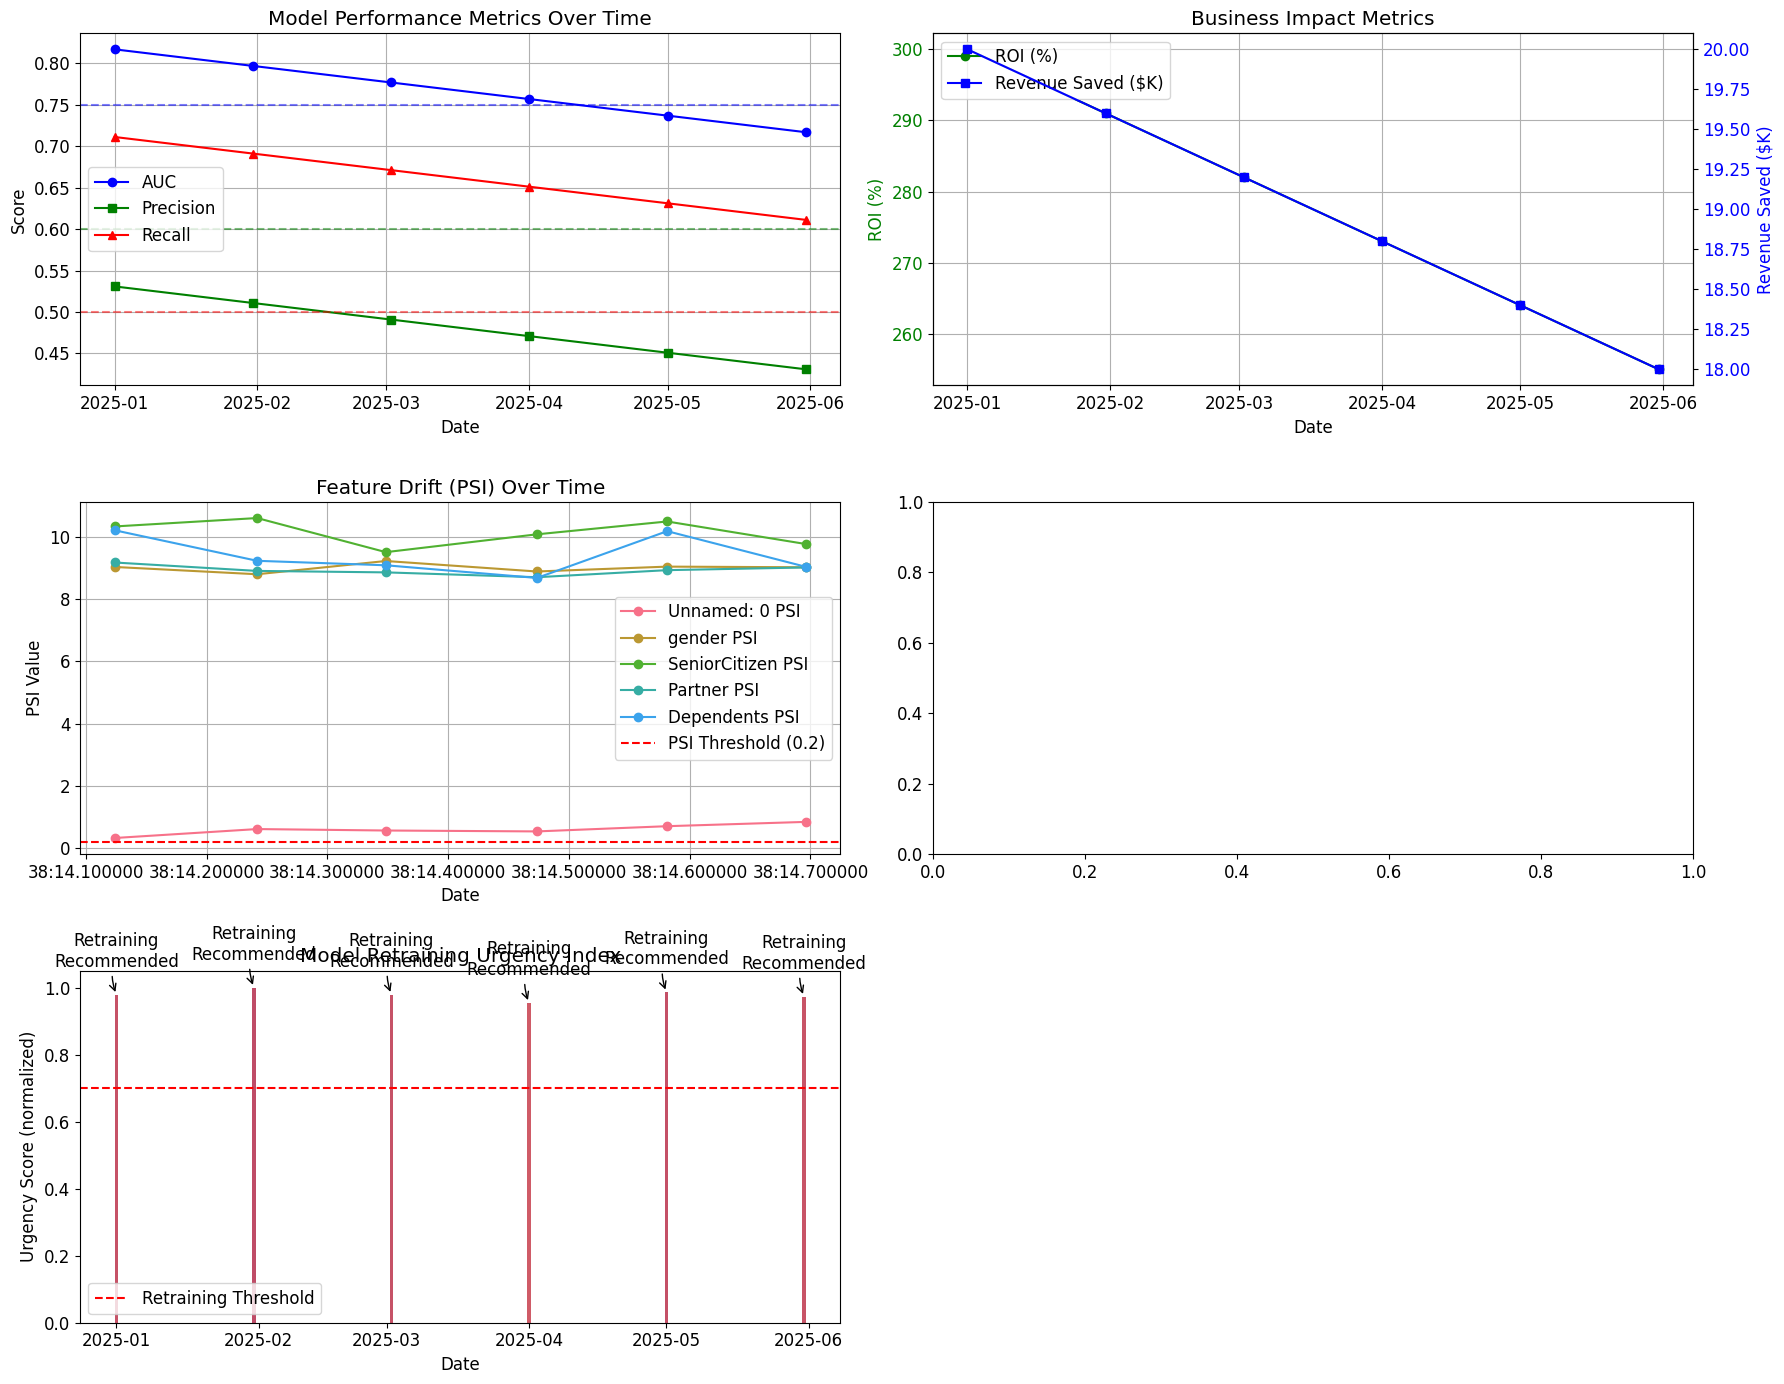

📊 Monitoring dashboard generated
   Key observations from monitoring:
   • Latest performance: AUC=0.717, Precision=0.431, Recall=0.611
   • Data drift detected in features: Unnamed: 0, gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, RevenuePerMonth, ServiceBundleScore, HighRiskContract, FiberOpticUser, PaperlessHighRisk, SingleCustomer, HighMonthlyCharges, TenureChargesRatio, ChargesPerService, StabilityScore
   • 🚨 RECOMMENDATION: Model retraining is necessary

✅ Model monitoring framework implementation complete!

🌟 Key Takeaways for Production Monitoring:
1. Implement automatic drift detection to identify when model inputs change
2. Track performance metrics over time to detect degradation early
3. Translate technical metrics into business impact metrics
4. Establish clear thresholds for when retraining is necessary
5. I

In [14]:
# Generate comprehensive monitoring dashboard
print("\n📊 Generating monitoring dashboard...")
monitoring.visualize_monitoring_dashboard()

print("\n✅ Model monitoring framework implementation complete!")
print("""
🌟 Key Takeaways for Production Monitoring:
1. Implement automatic drift detection to identify when model inputs change
2. Track performance metrics over time to detect degradation early
3. Translate technical metrics into business impact metrics
4. Establish clear thresholds for when retraining is necessary
5. Implement visualization dashboards for stakeholders at different levels
""")